<div align="center">
    <h1>Sistema de Ecuaciones Lineales</h1>
    <p>
        Autores:</br>
        Sergio Andrés Majé Franco</br>
        Marleny Rojas Gómez</br>
    </p>
    <p>
        Docente:</br>
        Dr. Jesús Emilio Pinto Lopera</br>
    </p>
    <p>
        Universidad de la Amazonia</br>
        Facultad de Ingeniería</br>
        Programa Ingeniería de Sistemas</br>
        Florencia - Caquetá</br>
        2022</br>
    </p>
</div>

## Tabla de Contenido

1. Introducción
2. Desarrollo Metodológico
    1. Desarrollo Teórico
        1. Método de Eliminación Gauss
            1. Eliminación Gaussiana con pivote
        2. Método de de Gauss-Jordan
            1. Eliminación Gauss-Jordan con pivoteo
        3. Descomposición LU
        4. Inversión de Matrices
        5. Método de Gauss-Seidel
    2. Desarrollo Computacional
        1. Método de Eliminación Gauss
        2. Método de de Gauss-Jordan
        3. Descomposición LU
        4. Inversión de Matrices
        5. Método de Gauss-Seidel
3. Resultados
    1. Ejercicios con los métodos
        1. Eliminación Gaussiana
        2. Eliminación Gauss-Jordan
        3. Descomposición LU
        4. Inversión de Matrices
        5. Método de Gauss-Seidel
    2. Benchmarking
4. Conclusiones
5. Referencias

## Tabla de Fórmulas

1. Fórmula 1. Eliminación Gaussiana con pivote - Eliminación hacia adelante
2. Fórmula 2. Eliminación Gaussiana con pivote - Sustitución hacia atrás
3. Fórmula 3. Método Gauss-Jordan - Transformación de la fila pivote - Matriz A
4. Fórmula 4. Método Gauss-Jordan - Transformación de la fila pivote - Matriz b
5. Fórmula 5. Método Gauss-Jordan - Transformación de la filas no pivote - Matriz A
6. Fórmula 6. Método Gauss-Jordan - Transformación de la filas no pivote - Matriz b
7. Fórmula 7. Descomposición LU - Descomposición de la Matriz A
8. Fórmula 8. Descomposición LU - Matriz LU de la matriz A
9. Fórmula 9. Descomposición LU - Igualdad de LU con y
10. Fórmula 10. Inversion de Matrices - Matriz identidad
11. Fórmula 11. Inversion de Matrices - Despejar x
12. Fórmula 12. Método Gauss-Seidel
13. Fórmula 13. Método Gauss-Seidel - Criterio
14. Fórmula 14. Método Gauss-Seidel - Convergencia
15. Fórmula 15. Método Gauss-Seidel - Generalización

## Tabla de Tablas

1. Tabla 1. Gauss - Matriz 2x2
2. Tabla 2. Gauss - Matriz 3x3
3. Tabla 3. Gauss - Matriz 4x4
4. Tabla 4. Gauss - Matriz 5x5
5. Tabla 5. Gauss-Jordan - Matriz 2x2
6. Tabla 6. Gauss-Jordan - Matriz 3x3
7. Tabla 7. Gauss-Jordan - Matriz 4x4
8. Tabla 8. Gauss-Jordan - Matriz 5x5
9. Tabla 9. Gauss-Seidel - Matriz 2x2
10. Tabla 10. Gauss-Seidel - Matriz 3x3
11. Tabla 11. Gauss-Seidel - Matriz 4x4
12. Tabla 12. Gauss-Seidel - Matriz 5x5


## Tabla de Gráficos

1. Gráfica 1. Gauss – tiempos
2. Gráfica 2. Gauss-Jordan – tiempos
3. Gráfica 3. Descomposición LU – tiempos
4. Gráfica 4. Inversión de Matrices
5. Gráfica 5. Gauss-Seidel - tiempos
5. Gráfica 6. Benchmarking - tiempos


## 1. Introducción

Un sistema de ecuación lineal es todo aquel que representa un conjunto de ecuaciones lineales, que, por medio de una estructura, al encontrar los valores deseados de las respectivas variables, generan un óptimo resultado para las ecuaciones implementadas, es un sistema con n incógnitas, m ecuaciones y el cual puede ser interpretado con la notación matricial desarrollada. Tiene distintas ventajas las cuales nos permiten destacarlo en algún fenómeno de la vida real, poder probarlo, implementarlo, ejecutarlo, logrando resolver variedad de problemas y así el interés de encontrar la solución esperada.

Durante el proceso que se implemento para cada uno de los métodos, se desea obtener un aprendizaje de gran escala, por lo tanto, saber el paso a paso en cada uno de ellos, donde por medio de los ejercicios anexados podemos encontrar múltiples respuestas y procedimientos según el método. El método de Gauss, Gauss-Jordan, Descomposición LU, inversión de matrices y el método de Gauss-Seidel, nos permitieron realizar un recorrido para conocer su estructura y que compone cada uno de ellos.

Lo que se pretende para con el presente documento, es realizar un análisis de los tiempos que se manejan en las diferentes dimensiones de cada método, cual es el cambio que se presenta de acuerdo con el tiempo, variables y estimaciones como resultado.

## 2. Desarrollo Metodológico

### 2.1. Desarrollo Teórico

#### 2.1.1. Método de Eliminación Gauss

La eliminación gaussiana también se conoce como el método de reducción de filas. Es un algoritmo comúnmente utilizado para resolver problemas lineales. El algoritmo implica una serie de operaciones de fila en una matriz de coeficientes extraídos de las ecuaciones lineales hasta que la matriz se reduce a la forma escalonada.

Las siguientes tres operaciones se realizan cuando se transforma una matriz en una forma escalonada. Éstos incluyen:

* Multiplicar una fila por un escalar y sumarlo o restarlo de otra fila.
* Intercambio de filas.
* Multiplicar filas con un escalar.

Una matriz está en forma escalonada de filas si el primer elemento de cada fila, también conocido como la entrada inicial, es un cero; la entrada inicial de cada fila está una columna a la derecha de la entrada inicial de la fila anterior. Además, las filas con elementos cero deben estar debajo de los elementos que tienen filas distintas de cero.

Las operaciones de fila se clasifican en gran medida en dos. La eliminación directa implica reducir una matriz a forma escalonada para determinar si existe una solución viable y si es finita o infinita. Por otro lado, la sustitución hacia atrás reduce aún más la matriz a la forma escalonada reducida por filas.

##### 2.1.1.1 Eliminación Gaussiana con pivote

$$ A_k = A_k - A_i \cdot \frac{a_{k, i}}{a_{i, i}} $$

<div align="center">
    Formula 1. Eliminación Gaussiana con pivote - Eliminación hacia adelante
</div>

$$ x_i = \frac{b^{(i - 1)}_{i} - \sum^{n}_{j = i + 1} A^{(i - 1)}_{i, j} \cdot x_j}{A^{(i - 1)}_{i, i}} $$

<div align="center">
    Formula 2. Eliminación Gaussiana con pivote - Sustitución hacia atrás
</div>

Pivotar es el intercambio de filas y columnas para obtener el elemento de pivote adecuado. Un elemento de pivote adecuado debe ser distinto de cero y significativamente grande pero más pequeño en comparación con las otras entradas de la fila.

El pivote se clasifica en pivote parcial y pivote completo. Bajo el algoritmo de pivote parcial, el elemento más grande se considera el elemento pivote para minimizar los errores de redondeo.

Por otro lado, el pivoteo completo incluye el intercambio de filas y columnas para obtener el mejor elemento de pivote, aumentando así la precisión.

Un conjunto de ecuaciones se considera lineal si ninguna variable tiene un exponente de más de uno. La eliminación gaussiana implica una serie de pasos; el primer paso consiste en crear una matriz de coeficientes.

Una matriz de coeficientes es simplemente una matriz de coeficientes extraídos de un conjunto de ecuaciones lineales. El siguiente paso consiste en crear una matriz aumentada que luego se somete a una serie de operaciones que la reducen a una forma escalonada.

Sin embargo, en los casos en que el elemento pivote sea cero o de muy pequeña magnitud, tenemos que intercambiar la fila pivote con una fila inferior.

Luego podemos leer el contenido de la matriz aumentada, aplicar el método de eliminación, sustitución hacia atrás y finalmente mostrar la respuesta.

#### 2.1.2. Método de Gauss-Jordan

El método de Gauss-Jordan se basa en transformar una matriz, utilizando operaciones para resolver sistemas de ecuaciones de n número de variables. El uso de este método consiste en saber aplicarlo en cada operación que se vaya a realizar, implementándose en toda la fila o a toda la columna según el ejercicio.

Tiene como objetivo principal, tratar de convertir lo que conlleva en la matriz, los coeficientes de las variables en una matriz de identidad o matriz de escalón reducida, y todo se logra a partir de las distintas operaciones como la eliminación, escalamiento e intercambio de filas y columnas.

##### 2.1.2.1. Eliminación Gauss-Jordan con pivoteo

$$
a^{*}_{k, j} = \frac{a_{k, j}}{a_{k, k}}
\left\lbrace
\begin{array}{ll}
k = 1, ..., n\\
j = k, ..., n
\end{array}
\right.
$$

<div align="center">
    Formula 3. Método Gauss-Jordan - Transformación de la fila pivote - Matriz A
</div>

$$
b^{*}_{k} = \frac{b_{k}}{a_{k, k}}
\left\lbrace
\begin{array}{ll}
k = 1, ..., n
\end{array}
\right.
$$

<div align="center">
    Formula 4. Método Gauss-Jordan - Transformación de la fila pivote - Matriz b
</div>

$$
a^{*}_{i, j} = a_{i, j} - a_{i, j} \cdot a^{*}_{k, j}
\left\lbrace
\begin{array}{ll}
k = 1, ..., n\\
i = 1, ..., n, i \neq k\\
j = k, ..., n
\end{array}
\right.
$$

<div align="center">
    Formula 5. Método Gauss-Jordan - Transformación de la filas no pivote - Matriz A
</div>

$$
b^{*}_{i} = b_{i} - a_{i, k} \cdot b^{*}_{k}
\left\lbrace
\begin{array}{ll}
k = 1, ..., n\\
i = 1, ..., n, i \neq k
\end{array}
\right.
$$

<div align="center">
    Formula 6. Método Gauss-Jordan - Transformación de la filas no pivote - Matriz b
</div>

Al igual que el proceso de pivote para la eliminación Gaussiana, en la eliminación Gauss-Jordan es muy simular en la serie de pasos a aplicar.

El primer paso consiste en crear una matriz de coeficientes y de constantes.

El siguiente paso consiste en crear una matriz aumentada que luego se somete a una serie de operaciones iterativas que la reducen a una forma escalonada.

Sin embargo, en los casos en que el elemento pivote sea cero o de muy pequeña magnitud, tenemos que intercambiar la fila pivote con una fila inferior.

Luego podemos leer el contenido de la matriz aumentada, aplicar la división del pivote descrito en la formulas 3 y 4, el método de eliminación descrito en la formulas 5 y 6, y finalmente mostrar la respuesta.

#### 2.1.3. Descomposición LU

Este método sirve para resolver sistemas de ecuaciones lineales debido a que consiste, como lo su nombre lo indica, en la descomposición de la matriz de coeficientes ($ A $) en dos matrices diferentes ($ L $ y $ U $).

$$ A = L \cdot U $$

<div align="center">
    Formula 7. Descomposición LU - Descomposición de la Matriz A
</div>

La matriz $ L $ va a ser una matriz triangular inferior de $ A $.

La matriz $ U $ va a ser una matriz triangular superior de $ A $ con la diagonal igual a $ 1 $.

$$ L \cdot U \cdot x = b $$

<div align="center">
    Formula 8. Descomposición LU - Matriz LU de la matriz A
</div>

Para el desarrollo de este método se igualan las matrices $ LU $ con una variable para facilitar su implementación.

$$
U \cdot x = y
\hspace{1cm}
L \cdot y = b
$$

<div align="center">
    Formula 9. Descomposición LU - Igualdad de LU con y
</div>

Una vez igualadas las matrices $ LU $ a una variable se debe ampliar la matriz $ L $ con el sistema de nuevas variables e igualarlas a las constantes de la matriz $ A $, luego se convierte a un sistema de ecuaciones lineales y se resuelven las incógnitas.

Obtenidas las incógnitas del nuevo sistema de variables se halla $ U \cdot x = y $ ampliando la matriz con el sistema de variables de la matriz $ A $ y reemplazando las constantes de $ A $ por las incógnitas halladas en el sistema de variables nuevo. luego, al igual que en el paso anterior se debe convertir a un sistema de ecuaciones lineales y resolver las incógnitas.

El resultado de las incógnitas del paso anterior serán el resultado del sistema de ecuaciones lineales original ($ A \cdot x = b $).

Se debe tener presente que, al momento de resolver la matriz, y es $ 2 x 2 $ se hace con $ 1 $ iteración, $ 3 x 3 $ con $ 2 $ y así sucesivamente con el resto.

#### 2.1.4. Inversión de Matrices

Partimos de lo siguiente: si una matriz $ n * n $ es una matriz cuadrada de dimensión $n$, pero si el número de filas y columnas no son lo mismo es una matriz rectangular. Por lo tanto, A una matriz cuadrada de dimensión $n$, entonces $B$ es una matriz inversa de $A$ si se cumplen.

$$ A \cdot B = I_n = B \cdot A $$

<div align="center">
    Formula 10. Inversion de Matrices - Matriz identidad
</div>

Donde, $I_n$ es la matriz de identidad con dimensión $n$.

Se considera que la dimensión $B$ también debe ser nxn para llevar el calculo del contenido matricial por ambos. En el transcurso de las definiciones conoceremos que en realidad solo existe una matriz inversa donde si se cumple una de las dos igualdades se cumplirá la otra, para eso es necesario llevar detalladamente le procedimiento y los pasos a seguir para cada matriz, por lo tanto, dicha matriz es única, se denota como $A - 1$ y esto se lee la inversa de $A$.

• Para conocer un poco se debe tener presente que no todas las matrices cuadradas tienen inversa
• Por ejemplo, si la matriz $A$ tiene inversa, de deduce que es regular o invisible sino entonces es singular
• Para multiplicar por uno y otro, se debe tener en cuenta que las dimensiones deben ser las apropiadas.

La inversa de una matriz es única: sea A una matriz de dimensión n, por lo tanto solo tiene una matriz inversa y se le puede asignar un nombre propio.

Para la obtención de una matriz inversa nos presenta que existen diversos métodos para los cuales se puede llevar a cabo el calculo de la matriz y entre los más utilizados están matriz inversa por Gauss y a partir de la matriz adjunta.

La grata conclusión que se puede obtener una vez vista los parámetros, como y para que sirve la inversa de una matriz, podemos deducir que representa una herramienta importante para toda solución de sistemas de ecuaciones lineales, que es el tema principal abordado en este documento y que cada matriz conlleva un procedimiento de acuerdo con su método.

$$
A \cdot x = b\\
x = A^{-1} \cdot b
$$

<div align="center">
    Formula 11. Inversion de Matrices - Despejar x
</div>

#### 2.2.5. Método de Gauss-Seidel

El método de Gauss-Seidel surgió de una mejoría al método Jacobs, acelerando su convergencia, por medio de iteraciones a partir de un vector inicial encuentras los respectivos valores de las incógnitas hasta poder encontrar la tolerancia estimada.

En punto es que cada vez que se estima encontrar un nuevo valor de una $ x_i $, usando los valores anteriores de las $ x $ también se puede utilizar los que actualmente se encuentran para con las $ x $, desde $ x_0 $ hasta $ x_i - 1 $.

Para ello se presenta la siguiente ecuación:

$$ x^{k}_{i} = \frac{b_i - \sum^{i - 1}_{j = 1}) a_{i, j} \cdot x^{k}{j} - \sum^{n}_{j = i + 1} a_{i, j} \cdot x^{k - 1}}{a_{i, j}}$$

<div align="center">
    Formula 12. Método Gauss-Seidel
</div>

Este método permite esencialmente recortar cierto número de iteraciones para lograr obtener el resultado esperado, los criterios que maneja son similares al método Jacobs.

El siguiente criterio es aplicado en varias dimensiones, ecuaciones lineales que al resolverlas se espera un óptimo resultado, que no solo se resuelven con el método de Gauss-Seidel, también con el Punto Fijo y Jacobs. Al aplicarlo y evaluarlo se arroja la siguiente expresión:

$$
\lvert \frac{a_{2, 1}}{a_{2, 2}} \rvert < 1
\hspace{1cm}
\lvert \frac{a_{1, 2}}{a_{1, 1}} \rvert < 1
$$

<div align="center">
    Formula 13. Método Gauss-Seidel - Criterio
</div>

Para asegurar la convergencia, en la ecuación el valor absoluto de las pendientes debe ser menos que la unidad.

$$
\lvert a_{2, 2} \rvert > \lvert a_{2, 1} \rvert
\hspace{1cm}
\lvert a_{1, 1} \rvert > \lvert a_{1, 2} \rvert
$$

<div align="center">
    Formula 14. Método Gauss-Seidel - Convergencia
</div>

El elemento diagonal debe ser mayor al que está afuera de la diagonal, para ello la generalización seria:

$$
\lvert a_{i, i} \rvert > \sum^{n}_{j = i} \lvert a_{i, j} \rvert
\left\lbrace
\begin{array}{ll}
j \neq i
\end{array}
\right.
$$

<div align="center">
    Formula 15. Método Gauss-Seidel - Generalización
</div>

En el transcurso del trabajo implementado sobre este método, se puede deducir que el método de Gauss-Seidel utiliza la misma transformación que el método de jacobi, dando una mejoría y ambos aportando gran equivalencia para la solución de los sistemas de ecuaciones lineales llevándolo a la aproximación sucesiva en la solución de estas ecuaciones.

### 2.2. Desarrollo Computacional

Para el desarrollo de computacional relacionado a este informe se uso el lenguaje de programación Python 3.10.7 y las siguientes librerías:

* timeit - librería especializada en el manejo del tiempo con mayor precisión.
* matplotlib - permite graficar los resultados de los procesos.
* numpy - se especializa en el cálculo, transformación y análisis de datos numéricos.
* pandas - permite la manipulación y análisis de datos sobre tablas numéricas y series temporales.

In [ ]:
from timeit import default_timer as timer

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Para medir el tiempo transcurrido de los algoritmos y funciones que se implementan en este informe se empleo la función decorador ```count_elapsed_time()```.

In [ ]:
def count_elapsed_time(func):
    '''
    Decorador.
    Ejecuta la función y calcula el tiempo transcurrido.
    Retorna el resultado de la función y el tiempo transcurrido.
    '''
    def wrapper(*args, **kwargs):
        start_time = timer()
        ret = func(*args, **kwargs)
        elapsed_time = timer() - start_time
        return (ret, elapsed_time)

    return wrapper

El método ```solve``` dará solución al sistema de ecuaciones $ A \cdot x = b $ mediante el método de desarrollo especificado.

In [ ]:
@count_elapsed_time
def solve(A: np.array, b: np.array, method, table: list, *args, **kwargs) -> np.array:
    '''Resuelve un sistema de ecuaciones Ax = b, por medio del método dado.

    Args:
        A (np.array): Matriz A.
        b (np.array): Matriz b.
        method (function): Método para resolve el sistema de ecuaciones.
        table (list): Recolección de datos del procedimiento.

    Raises:
        ValueError: Las filas y columnas de la matriz A deben ser iguales.
        ValueError: El tamaño de la matriz b debe coincidir con el de la matriz A.

    Returns:
        np.array: Matriz x. Solución del sistema de ecuaciones.
    '''
    m, n = A.shape[-2:]
    if m != n:
        raise ValueError('Las filas y columnas de la matriz A deben ser iguales.')

    if len(A) != len(b):
        raise ValueError(f'El tamaño matriz b debe ser de {len(A)}')

    return method(A, b, table=table, *args, **kwargs)

#### 2.2.1 Método de Eliminación Gauss

El método ```gauss``` provee una implementación de la eliminación Gaussian con pivote para resolver sistema de ecuaciones lineales $ A \cdot x = b$

In [ ]:
def gauss(A: np.array, b: np.array, table: list) -> np.array:
    '''Implementación del método de eliminación de Gauss con pivote
    para la resolución de sistemas de ecuaciones lineales Ax=b.

    Args:
        A (np.array): Matriz A.
        b (np.array): Matriz b.
        table (list): Recolección de datos del procedimiento.

    Returns:
        np.array: Matriz x. Solución del sistema de ecuaciones.
    '''
    n = len(b)
    x = np.zeros(n, np.float64)
    A_aux = np.copy(A)
    b_aux = np.copy(b)

    for k in range(n - 1):
        # Intercambio de filas
        if np.fabs(A_aux[k, k]) < 1.0e-12:
            for i in range(k + 1, n):
                if np.fabs(A_aux[i, k]) > np.fabs(A_aux[k, k]):
                    A_aux[[k, i]] = A_aux[[i, k]]
                    b_aux[[k, i]] = b_aux[[i, k]]

                    table.append([k, 'Intercambio', i, None, None])

                    break

        # Eliminación hacia adelante
        for i in range(k + 1, n):
            if A_aux[i, k] == 0:
                continue

            factor = A_aux[k, k] / A_aux[i, k]

            A_aux[i, k:] = A_aux[k, k:] - A_aux[i, k:] * factor
            b_aux[i] = b_aux[k] - b_aux[i] * factor

            table.append([k, 'Eliminación', i, factor, None])

    # Sustitución hacia atrás
    x[n - 1] = b_aux[n - 1] / A_aux[n - 1, n - 1]

    table.append([None, 'Sustitución', n - 1, None, None])

    for i in range(n - 2, -1, -1):
        sum_ax = sum(A_aux[i, j] * x[j] for j in range(i + 1, n))
        x[i] = (b_aux[i] - sum_ax) / A_aux[i, i]

        table.append([None, 'Sustitución', i, None, sum_ax])

    return x

#### 2.2.2. Método de Gauss-Jordan

El método ```gauss_jordan``` provee una implementación de la eliminación Gauss-Jordan con pivote para resolver sistema de ecuaciones lineales $ A \cdot x = b$

In [ ]:
def gauss_jordan(A: np.array, b: np.array, table: list) -> np.array:
    '''Implementación del método de eliminación de Gauss-Jordan con pivote.

    Args:
        A (np.array): Matriz A.
        b (np.array): Matriz b.
        table (list): Recolección de datos del procedimiento.

    Returns:
        np.array: Matriz x. Solución del sistema de ecuaciones.
    '''
    n = len(b)
    A_aux = np.copy(A)
    b_aux = np.copy(b)

    for k in range(n):
        # Intercambio de filas
        if np.fabs(A_aux[k, k]) < 1.0e-12:
            for i in range(k + 1, n):
                if np.fabs(A_aux[i, k]) > np.fabs(A_aux[k, k]):
                    A_aux[[k, i]] = A_aux[[i, k]]
                    b_aux[[k, i]] = b_aux[[i, k]]
                    table.append([k, 'Intercambio', i, None, None])
                    break

        # División del pivote
        pivot = A_aux[k, k]
        A_aux[k, k:] /= pivot
        b_aux[k] /= pivot

        # Eliminación
        for i in range(n):
            if i == k or A_aux[i, k] == 0:
                continue

            factor = A_aux[i, k]
            A_aux[i, k:] -= A_aux[k, k:] * factor
            b_aux[i] -= b_aux[k] * factor

            table.append([k, 'Eliminación', i, pivot, factor])

    return b_aux

#### 2.2.3. Descomposición LU

El método ```LU_decompose``` provee una implementación con pivote del método numérico descomposición LU para resolver sistema de ecuaciones lineales $ A \cdot x = b$

In [ ]:
def lu_factor(A: np.ndarray):
    '''Factorización LU con pivote parcial.

    Args:
        A (np.ndarray): Matriz A.

    Returns:
        np.ndarray, np.ndarray: Matriz LU y pivote.
    '''
    n = A.shape[0]
    A = np.copy(A)
    piv = np.arange(0, n)
    for k in range(n - 1):
        # pivote
        max_row_index = np.argmax(abs(A[k:n, k])) + k
        piv[[k, max_row_index]] = piv[[max_row_index, k]]
        A[[k, max_row_index]] = A[[max_row_index, k]]

        # LU
        for i in range(k+1, n):
            A[i, k] = A[i, k] / A[k, k]
            for j in range(k + 1, n):
                A[i, j] -= A[i, k] * A[k, j]

    return A, piv


def forward_substitution(L: np.ndarray, b: np.ndarray) -> np.ndarray:
    '''Sustitución hacia adelante para resolver Ly = b.

    Args:
        L (np.ndarray): Matriz L.
        b (np.ndarray): Matriz b.

    Returns:
        np.ndarray: Matriz y.
    '''
    b = np.copy(b)

    for i in range(L.shape[0]):
        for j in range(i):
            b[i] -= L[i,j] * b[j]

    return b


def backward_substitution(U: np.ndarray, y: np.ndarray) -> np.ndarray:
    '''Sustitución hacia atrás para resolver Ux = y.

    Args:
        U (np.ndarray): Matriz U.
        y (np.ndarray): Matriz y.

    Returns:
        np.ndarray: Matriz x.
    '''
    y = np.copy(y)

    for i in range(U.shape[0] - 1, -1, -1):
        for j in range(i + 1, U.shape[1]):
            y[i] -= U[i, j] * y[j]
        y[i] = y[i] / U[i, i]

    return y


def LU_decompose(A: np.ndarray, b: np.ndarray, *, table: list) -> np.ndarray:
    '''Implementación de la descomposición LU.

    Args:
        A (np.ndarray): Matriz A.
        b (np.ndarray): Matriz B.
        table (list): Recolección de datos del procedimiento.

    Returns:
        np.ndarray: Matriz x. Solución del sistema de ecuaciones.
    '''
    LU, piv = lu_factor(A)
    b = b[piv]  # intercambio de filas
    y = forward_substitution(LU, b)
    return backward_substitution(LU, y)

#### 2.2.4. Inversión de Matrices

El método ```inversion``` provee una implementación de del método numérico inversion de matrices para resolver sistema de ecuaciones lineales $ A \cdot x = b$

In [ ]:
def inversion(A: np.ndarray, b: np.ndarray, *, table: list) -> np.ndarray:
    '''Implementación del método de inversión de matrices.

    Args:
        A (np.ndarray): Matriz A.
        b (np.ndarray): Matriz b.
        table (list): Recolección de datos del procedimiento.

    Raises:
        ValueError: determinante de A es igual a cero.

    Returns:
        np.ndarray: Matriz x.
    '''
    if np.linalg.det(A) == 0:
        raise ValueError('La sistema de ecuaciones no tiene solución por medio de este método')

    A_inv = np.linalg.inv(A)

    return A_inv.dot(b)

#### 2.2.5. Método de Gauss-Seidel

El método ```gauss_seidel``` provee una implementación de iterativa del método numérico Gauss-Seidel para resolver sistema de ecuaciones lineales $ A \cdot x = b$

In [ ]:
def gauss_seidel(
    A: np.array,
    b: np.array,
    *,
    max = 50,
    error_total: float = 1.0e-4,
    table: list
) -> np.array:
    '''
    Implementación del método de Gauss-Seidel.

    Args:
        A (np.array): Matriz A.
        b (np.array): Matriz b.
        error_total (float): Error permitido.
        table (list): Recolección de datos del procedimiento.

    Returns:
        np.array: Matriz x. Solución del sistema de ecuaciones.
    '''
    error = np.ones(len(b))
    x = np.zeros(len(b))
    aux = np.zeros(len(b))  # x_i-1
    L = np.tril(A)
    U = A - L
    i = 0

    while any(error > error_total) and max > i:
        x = np.dot(
            np.linalg.inv(L),
            b - U.dot(x)
        )

        error = x - aux
        aux = x

        i += 1
        table.append([i, x, error])

    return x

## 3. Resultados

Las siguientes matrices $2x2$, $3x3$, $4x4$, $5x5$; serán empleadas en la elaboración de los ejercicios del presente informe.

In [ ]:
matrices = {
    2: {
        'A': np.array([[3, 5],
                       [2, 1]], np.float64),
        'b': np.array([3, 1], np.float64)
    },
    3: {
        'A': np.array([[1, -1, 2],
                       [2, 1, 0],
                       [3, 1, 4]], np.float64),
        'b': np.array([6, 7, 18], np.float64)
    },
    4: {
        'A': np.array([[1, 2, -1, 1],
                       [2, -1, 2, 3],
                       [-1, 3, 3, -2],
                       [3, -2, 1, 1]], np.float64),
        'b': np.array([0, 7, 17, -2], np.float64)
    },
    5: {
        'A': np.array([[2, -1, 4, 1, -1],
                       [-1, 3, -2, -1, 2],
                       [5, 1, 3, -4, 1],
                       [3, -2, -2, -2, 3],
                       [-4, -1, -5, 3, -4]], np.float64),
        'b': np.array([7, 1, 33, 24, -49], np.float64)
    }
}


times = []
benchmarking = []

### 3.1. Ejercicios con los métodos

#### 3.1.1. Eliminación Gaussiana

Ejercicio con la matriz $2x2$.

In [ ]:
table = []

x, t = solve(
    matrices[2]['A'],
    matrices[2]['b'],
    gauss,
    table
)

times.append(t)

f'Time: {t:.6f}s'

'Time: 0.000217s'

In [ ]:
f'El resultado de la operación es: x: {x[0]}, y: {x[1]}'

'El resultado de la operación es: x: 0.28571428571428575, y: 0.42857142857142855'

In [ ]:
pd.DataFrame(np.array(table), columns=['Iteración', 'Operación', 'Índice', 'factor', 'sum(Ax)'])

,Iteración,Operación,Índice,factor,sum(Ax)
0,0,Eliminación,1,1.5,None
1,None,Sustitución,1,None,None
2,None,Sustitución,0,None,2.142857


<div align="center">
    Tabla 1. Gauss - matriz 2x2
</div>

Ejercicio con la matriz $3x3$.

In [ ]:
table = []

x, t = solve(
    matrices[3]['A'],
    matrices[3]['b'],
    gauss,
    table
)

times.append(t)

f'Time: {t:.6f}s'

'Time: 0.002253s'

In [ ]:
f'El resultado de la operación es: x: {x[0]}, y: {x[1]}, z: {x[2]}'

'El resultado de la operación es: x: 3.0, y: 1.0, z: 2.0'

In [ ]:
pd.DataFrame(np.array(table), columns=['Iteración', 'Operación', 'Índice', 'factor', 'sum(Ax)'])

,Iteración,Operación,Índice,factor,sum(Ax)
0,0,Eliminación,1,0.5,None
1,0,Eliminación,2,0.333333,None
2,1,Eliminación,2,1.125,None
3,None,Sustitución,2,None,None
4,None,Sustitución,1,None,4.0
5,None,Sustitución,0,None,3.0


<div align="center">
    Tabla 2. Gauss - matriz 3x3
</div>

Ejercicio con la matriz $4x4$.

In [ ]:
table = []

x, t = solve(
    matrices[4]['A'],
    matrices[4]['b'],
    gauss,
    table
)

times.append(t)

f'Time: {t:.6f}s'

'Time: 0.000297s'

In [ ]:
f'El resultado de la operación es: w: {x[0]}, x: {x[1]}, y: {x[2]}, z: {x[3]}'

'El resultado de la operación es: w: -1.0, x: 2.0, y: 4.0, z: 1.0'

In [ ]:
pd.DataFrame(np.array(table), columns=['Iteración', 'Operación', 'Índice', 'factor', 'sum(Ax)'])

,Iteración,Operación,Índice,factor,sum(Ax)
0,0,Eliminación,1,0.5,None
1,0,Eliminación,2,-1.0,None
2,0,Eliminación,3,0.333333,None
3,1,Eliminación,2,0.5,None
4,1,Eliminación,3,0.9375,None
5,2,Eliminación,3,4.0,None
6,None,Sustitución,3,None,None
7,None,Sustitución,2,None,0.0
8,None,Sustitución,1,None,-8.5
9,None,Sustitución,0,None,1.0


<div align="center">
    Tabla 3. Gauss - matriz 4x4
</div>

Ejercicio con la matriz $5x5$.

In [ ]:
table = []

x, t = solve(
    matrices[5]['A'],
    matrices[5]['b'],
    gauss,
    table
)

times.append(t)

f'Time: {t:.6f}s'

'Time: 0.005944s'

In [ ]:
f'El resultado de la operación es: v: {x[0]}, w: {x[1]}, x: {x[2]}, y: {x[3]}, z: {x[4]}'

'El resultado de la operación es: v: 1.0000000000000004, w: -1.9999999999999993, x: 2.9999999999999996, y: -4.0, z: 4.999999999999999'

In [ ]:
pd.DataFrame(np.array(table), columns=['Iteración', 'Operación', 'Índice', 'factor', 'sum(Ax)'])

,Iteración,Operación,Índice,factor,sum(Ax)
0,0,Eliminación,1,-2.0,None
1,0,Eliminación,2,0.4,None
2,0,Eliminación,3,0.666667,None
3,0,Eliminación,4,-0.5,None
4,1,Eliminación,2,-3.571429,None
5,1,Eliminación,3,15.0,None
6,1,Eliminación,4,-3.333333,None
7,2,Eliminación,3,-0.125,None
8,2,Eliminación,4,2.0,None
9,3,Eliminación,4,-0.593284,None


<div align="center">
    Tabla 4. Gauss - matriz 5x5
</div>

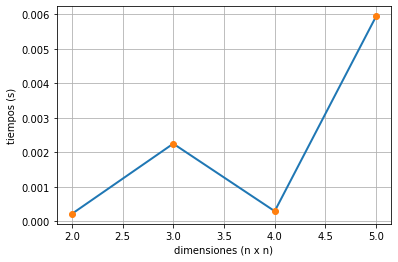

In [ ]:
benchmarking.append([times, 'Gauss'])

plt.plot([2, 3, 4, 5], times, linewidth=2.0)
plt.plot([2, 3, 4, 5], times, 'o', linewidth=2.0)

plt.xlabel('dimensiones (n x n)')
plt.ylabel('tiempos (s)')
plt.grid()
plt.show()

<div align="center">
    Gráfica 1. Gauss - tiempos
</div>

#### 3.1.2. Eliminación Gauss-Jordan

Ejercicio con la matriz $2x2$.

In [ ]:
table = []

x, t = solve(
    matrices[2]['A'],
    matrices[2]['b'],
    gauss_jordan,
    table
)

times = [t]
f'Time: {t:.6f}s'

'Time: 0.000180s'

In [ ]:
f'El resultado de la operación es: x: {x[0]}, y: {x[1]}'

'El resultado de la operación es: x: 0.2857142857142857, y: 0.42857142857142855'

In [ ]:
pd.DataFrame(np.array(table), columns=['Iteración', 'Operación', 'Índice', 'pivote', 'factor'])

,Iteración,Operación,Índice,pivote,factor
0,0,Eliminación,1,3.0,2.0
1,1,Eliminación,0,-2.3333333333333335,1.6666666666666667


<div align="center">
    Tabla 5. Gauss-Jordan - matriz 2x2
</div>

Ejercicio con la matriz $3x3$.

In [ ]:
table = []

x, t = solve(
    matrices[3]['A'],
    matrices[3]['b'],
    gauss_jordan,
    table
)

times.append(t)

f'Time: {t:.6f}s'

'Time: 0.000220s'

In [ ]:
f'El resultado de la operación es: x: {x[0]}, y: {x[1]}, z: {x[2]}'

'El resultado de la operación es: x: 2.999999999999999, y: 1.0000000000000002, z: 2.0000000000000004'

In [ ]:
pd.DataFrame(np.array(table), columns=['Iteración', 'Operación', 'Índice', 'pivote', 'factor'])

,Iteración,Operación,Índice,pivote,factor
0,0,Eliminación,1,1.0,2.0
1,0,Eliminación,2,1.0,3.0
2,1,Eliminación,0,3.0,-1.0
3,1,Eliminación,2,3.0,4.0
4,2,Eliminación,0,3.333333333333333,0.6666666666666667
5,2,Eliminación,1,3.333333333333333,-1.3333333333333333


<div align="center">
    Tabla 6. Gauss-Jordan - matriz 3x3
</div>

Ejercicio con la matriz $4x4$.

In [ ]:
table = []

x, t = solve(
    matrices[4]['A'],
    matrices[4]['b'],
    gauss_jordan,
    table
)

times.append(t)

f'Time: {t:.6f}s'

'Time: 0.000288s'

In [ ]:
f'El resultado de la operación es: w: {x[0]}, x: {x[1]}, y: {x[2]}, z: {x[3]}'

'El resultado de la operación es: w: -0.9999999999999996, x: 2.0, y: 4.0, z: 0.9999999999999993'

In [ ]:
pd.DataFrame(np.array(table), columns=['Iteración', 'Operación', 'Índice', 'pivote', 'factor'])

,Iteración,Operación,Índice,pivote,factor
0,0,Eliminación,1,1.0,2.0
1,0,Eliminación,2,1.0,-1.0
2,0,Eliminación,3,1.0,3.0
3,1,Eliminación,0,-5.0,2.0
4,1,Eliminación,2,-5.0,5.0
5,1,Eliminación,3,-5.0,-8.0
6,2,Eliminación,0,6.0,0.6000000000000001
7,2,Eliminación,1,6.0,-0.8
8,2,Eliminación,3,6.0,-2.4000000000000004
9,3,Eliminación,0,-3.6,1.4


<div align="center">
    Tabla 7. Gauss-Jordan - matriz 4x4
</div>

Ejercicio con la matriz $5x5$.

In [ ]:
table = []

x, t = solve(
    matrices[5]['A'],
    matrices[5]['b'],
    gauss_jordan,
    table
)

times.append(t)

f'Time: {t:.6f}s'

'Time: 0.000274s'

In [ ]:
f'El resultado de la operación es: v: {x[0]}, w: {x[1]}, x: {x[2]}, y: {x[3]}, z: {x[4]}'

'El resultado de la operación es: v: 1.0, w: -1.9999999999999996, x: 3.000000000000001, y: -4.0, z: 5.0'

In [ ]:
pd.DataFrame(np.array(table), columns=['Iteración', 'Operación', 'Índice', 'pivote', 'factor'])

,Iteración,Operación,Índice,pivote,factor
0,0,Eliminación,1,2.0,-1.0
1,0,Eliminación,2,2.0,5.0
2,0,Eliminación,3,2.0,3.0
3,0,Eliminación,4,2.0,-4.0
4,1,Eliminación,0,2.5,-0.5
5,1,Eliminación,2,2.5,3.5
6,1,Eliminación,3,2.5,-0.5
7,1,Eliminación,4,2.5,-3.0
8,2,Eliminación,0,-7.0,2.0
9,2,Eliminación,3,-7.0,-8.0


<div align="center">
    Tabla 8. Gauss-Jordan - matriz 5x5
</div>

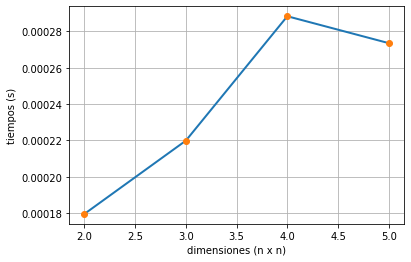

In [ ]:
benchmarking.append([times, 'Jordan'])

plt.plot([2, 3, 4, 5], times, linewidth=2.0)
plt.plot([2, 3, 4, 5], times, 'o', linewidth=2.0)

plt.xlabel('dimensiones (n x n)')
plt.ylabel('tiempos (s)')
plt.grid()
plt.show()

<div align="center">
    Gráfica 2. Gauss-Jordan - tiempos
</div>

#### 3.1.3. Descomposición LU

Ejercicio con la matriz $2x2$.

In [ ]:
x, t = solve(
    matrices[2]['A'],
    matrices[2]['b'],
    LU_decompose,
    []
)

times = [t]
f'Time: {t:.6f}s'

'Time: 0.000244s'

In [ ]:
f'El resultado de la operación es: x: {x[0]}, y: {x[1]}'

'El resultado de la operación es: x: 0.2857142857142856, y: 0.4285714285714286'

Ejercicio con la matriz $3x3$.

In [ ]:
x, t = solve(
    matrices[3]['A'],
    matrices[3]['b'],
    LU_decompose,
    []
)

times.append(t)

f'Time: {t:.6f}s'

'Time: 0.000283s'

In [ ]:
f'El resultado de la operación es: x: {x[0]}, y: {x[1]}, z: {x[2]}'

'El resultado de la operación es: x: 3.0, y: 1.0000000000000002, z: 2.0'

Ejercicio con la matriz $4x4$.

In [ ]:
x, t = solve(
    matrices[4]['A'],
    matrices[4]['b'],
    LU_decompose,
    []
)

times.append(t)

f'Time: {t:.6f}s'

'Time: 0.000407s'

In [ ]:
f'El resultado de la operación es: w: {x[0]}, x: {x[1]}, y: {x[2]}, z: {x[3]}'

'El resultado de la operación es: w: -1.0, x: 2.0, y: 4.0, z: 1.0000000000000002'

Ejercicio con la matriz $5x5$.

In [ ]:
x, t = solve(
    matrices[5]['A'],
    matrices[5]['b'],
    LU_decompose,
    table
)

times.append(t)

f'Time: {t:.6f}s'

'Time: 0.000330s'

In [ ]:
f'El resultado de la operación es: v: {x[0]}, w: {x[1]}, x: {x[2]}, y: {x[3]}, z: {x[4]}'

'El resultado de la operación es: v: 1.0000000000000009, w: -1.9999999999999998, x: 2.999999999999999, y: -4.0, z: 4.999999999999999'

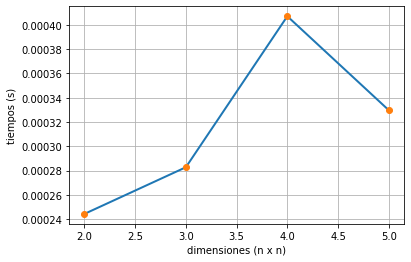

In [ ]:
benchmarking.append([times, 'LU'])

plt.plot([2, 3, 4, 5], times, linewidth=2.0)
plt.plot([2, 3, 4, 5], times, 'o', linewidth=2.0)

plt.xlabel('dimensiones (n x n)')
plt.ylabel('tiempos (s)')
plt.grid()
plt.show()

<div align="center">
    Gráfica 3. Descomposición LU - tiempos
</div>

#### 3.1.4. Inversión de Matrices

Ejercicio con la matriz $2x2$.

In [ ]:
x, t = solve(
    matrices[2]['A'],
    matrices[2]['b'],
    inversion,
    []
)

times = [t]
f'Time: {t:.6f}s'

'Time: 0.002998s'

In [ ]:
f'El resultado de la operación es: x: {x[0]}, y: {x[1]}'

'El resultado de la operación es: x: 0.28571428571428603, y: 0.4285714285714285'

Ejercicio con la matriz $3x3$.

In [ ]:
x, t = solve(
    matrices[3]['A'],
    matrices[3]['b'],
    inversion,
    []
)

times.append(t)

f'Time: {t:.6f}s'

'Time: 0.000300s'

In [ ]:
f'El resultado de la operación es: x: {x[0]}, y: {x[1]}, z: {x[2]}'

'El resultado de la operación es: x: 2.999999999999999, y: 0.9999999999999991, z: 2.0'

Ejercicio con la matriz $4x4$.

In [ ]:
x, t = solve(
    matrices[4]['A'],
    matrices[4]['b'],
    inversion,
    []
)

times.append(t)

f'Time: {t:.6f}s'

'Time: 0.000209s'

In [ ]:
f'El resultado de la operación es: w: {x[0]}, x: {x[1]}, y: {x[2]}, z: {x[3]}'

'El resultado de la operación es: w: -0.9999999999999998, x: 1.9999999999999998, y: 3.9999999999999996, z: 0.9999999999999996'

Ejercicio con la matriz $5x5$.

In [ ]:
x, t = solve(
    matrices[5]['A'],
    matrices[5]['b'],
    inversion,
    table
)

times.append(t)

f'Time: {t:.6f}s'

'Time: 0.000998s'

In [ ]:
f'El resultado de la operación es: v: {x[0]}, w: {x[1]}, x: {x[2]}, y: {x[3]}, z: {x[4]}'

'El resultado de la operación es: v: 0.9999999999999982, w: -2.000000000000001, x: 3.0, y: -3.9999999999999982, z: 5.0'

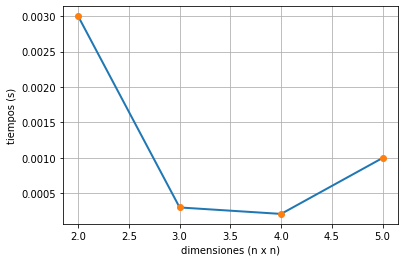

In [ ]:
benchmarking.append([times, 'Inversa'])

plt.plot([2, 3, 4, 5], times, linewidth=2.0)
plt.plot([2, 3, 4, 5], times, 'o', linewidth=2.0)

plt.xlabel('dimensiones (n x n)')
plt.ylabel('tiempos (s)')
plt.grid()
plt.show()

<div align="center">
    Gráfica 4. Inversion de Matrices 
</div>

#### 3.1.5. Método Gauss-Seidel

Ejercicio con la matriz $2x2$.

In [ ]:
table = []

x, t = solve(
    matrices[2]['A'],
    matrices[2]['b'],
    gauss_seidel,
    table,
    max=200
)

times = [t]
f'Time: {t:.6f}s'

'Time: 0.019888s'

In [ ]:
f'El resultado de la operación es: x: {x[0]}, y: {x[1]}'

'El resultado de la operación es: x: 8.067561320569263e+103, y: -1.6135122641138526e+104'

In [ ]:
pd.DataFrame(np.array(table), columns=['Iteración', 'x', 'error'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


,Iteración,x,error
0,1,"[1.0, -1.0]","[1.0, -1.0]"
1,2,"[2.6666666666666665, -4.333333333333333]","[1.6666666666666665, -3.333333333333333]"
2,3,"[8.222222222222221, -15.444444444444443]","[5.555555555555555, -11.11111111111111]"
3,4,"[26.740740740740737, -52.481481481481474]","[18.518518518518515, -37.03703703703703]"
4,5,"[88.46913580246913, -175.93827160493825]","[61.72839506172839, -123.45679012345678]"
...,...,...,...
195,196,"[6.534724669661107e+101, -1.3069449339322214e+...","[4.574307268762775e+101, -9.14861453752555e+101]"
196,197,"[2.178241556553702e+102, -4.356483113107404e+102]","[1.5247690895875913e+102, -3.0495381791751827e..."
197,198,"[7.260805188512339e+102, -1.4521610377024678e+...","[5.082563631958638e+102, -1.0165127263917275e+..."
198,199,"[2.4202683961707793e+103, -4.840536792341559e+...","[1.6941878773195454e+103, -3.388375754639091e+..."


<div align="center">
    Tabla 9. Gauss-Seidel - matriz 2x2
</div>

Ejercicio con la matriz $3x3$.

In [ ]:
table = []

x, t = solve(
    matrices[3]['A'],
    matrices[3]['b'],
    gauss_seidel,
    table
)

times.append(t)

f'Time: {t:.6f}s'

'Time: 0.022288s'

In [ ]:
f'El resultado de la operación es: x: {x[0]}, y: {x[1]}, z: {x[2]}'

'El resultado de la operación es: x: -1275242997.4280949, y: 2550486001.8561897, z: 318810752.1070238'

In [ ]:
pd.DataFrame(np.array(table), columns=['Iteración', 'x', 'error'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


,Iteración,x,error
0,1,"[6.0, -5.0, 1.2499999999999996]","[6.0, -5.0, 1.2499999999999996]"
1,2,"[-1.4999999999999991, 9.999999999999998, 3.125]","[-7.499999999999999, 14.999999999999998, 1.875..."
2,3,"[9.749999999999998, -12.499999999999996, 0.3125]","[11.249999999999996, -22.499999999999993, -2.8..."
3,4,"[-7.1249999999999964, 21.249999999999993, 4.53...","[-16.874999999999993, 33.749999999999986, 4.21..."
4,5,"[18.187499999999993, -29.374999999999986, -1.7...","[25.31249999999999, -50.62499999999998, -6.328..."
5,6,"[-19.781249999999986, 46.56249999999997, 7.695...","[-37.96874999999998, 75.93749999999996, 9.4921..."
6,7,"[37.17187499999998, -67.34374999999996, -6.542...","[56.953124999999964, -113.90624999999993, -14...."
7,8,"[-48.257812499999964, 103.51562499999993, 14.8...","[-85.42968749999994, 170.8593749999999, 21.357..."
8,9,"[79.88671874999994, -152.7734374999999, -17.22...","[128.14453124999991, -256.28906249999983, -32...."
9,10,"[-112.33007812499991, 231.66015624999983, 30.8...","[-192.21679687499986, 384.4335937499997, 48.05..."


<div align="center">
    Tabla 10. Gauss-Seidel - matriz 3x3
</div>

Ejercicio con la matriz $4x4$.

In [ ]:
table = []

x, t = solve(
    matrices[4]['A'],
    matrices[4]['b'],
    gauss_seidel,
    table
)

times.append(t)

f'Time: {t:.6f}s'

'Time: 0.009198s'

In [ ]:
f'El resultado de la operación es: w: {x[0]}, x: {x[1]}, y: {x[2]}, z: {x[3]}'

'El resultado de la operación es: w: 4.588885377855392e+40, x: 7.535908930869659e+40, y: -6.83508210634873e+40, z: 8.14024383452187e+40'

In [ ]:
pd.DataFrame(np.array(table), columns=['Iteración', 'x', 'error'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


,Iteración,x,error
0,1,"[-2.8363554891018876e-15, -7.000000000000006, ...","[-2.8363554891018876e-15, -7.000000000000006, ..."
1,2,"[55.33333333333334, 43.00000000000003, -38.000...","[55.33333333333334, 50.000000000000036, -50.66..."
2,3,"[-80.00000000000021, -375.0000000000004, 324.6...","[-135.33333333333354, -418.00000000000045, 362..."
3,4,"[1911.3333333333344, 1955.000000000002, -1870....","[1991.3333333333346, 2330.0000000000023, -2194..."
4,5,"[-5824.00000000001, -15263.000000000018, 13356...","[-7735.333333333345, -17218.000000000022, 1522..."
5,6,"[70295.3333333334, 88059.00000000012, -82230.0...","[76119.33333333342, 103322.00000000013, -95586..."
6,7,"[-305808.00000000047, -633703.0000000008, 5634...","[-376103.33333333384, -721762.0000000009, 6456..."
7,8,"[2744215.3333333363, 3875059.0000000047, -3569...","[3050023.3333333367, 4508762.000000006, -41326..."
8,9,"[-14406080.00000002, -26690511.00000004, 23946...","[-17150295.33333336, -30565570.000000045, 2751..."
9,10,"[111436407.3333335, 168438155.00000033, -15403...","[125842487.33333352, 195128666.00000036, -1779..."


<div align="center">
    Tabla 11. Gauss-Seidel - matriz 4x4
</div>

Ejercicio con la matriz $5x5$.

In [ ]:
table = []

x, t = solve(
    matrices[5]['A'],
    matrices[5]['b'],
    gauss_seidel,
    table
)

times.append(t)

f'Time: {t:.6f}s'

'Time: 0.010041s'

In [ ]:
f'El resultado de la operación es: v: {x[0]}, w: {x[1]}, x: {x[2]}, y: {x[3]}, z: {x[4]}'

'El resultado de la operación es: v: 1.6629981614884656e+27, w: 6.489548691596904e+26, x: -9.284357707879191e+27, y: 6.783388429574996e+27, z: 1.4867751578251848e+28'

In [ ]:
pd.DataFrame(np.array(table), columns=['Iteración', 'x', 'error'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


,Iteración,x,error
0,1,"[3.500000000000001, 1.5, 4.666666666666666, -1...","[3.500000000000001, 1.5, 4.666666666666666, -1..."
1,2,"[-2.197916666666665, 3.170138888888887, -1.233...","[-5.697916666666666, 1.670138888888887, -5.900..."
2,3,"[18.6454716435185, 0.25286940586419515, -55.50...","[20.843388310185166, -2.917269483024692, -54.2..."
3,4,"[138.28198794769148, -42.956597054773205, -158...","[119.63651630417297, -43.2094664606374, -102.8..."
4,5,"[269.8268679430017, -163.95412648565377, 196.6...","[131.5448799953102, -120.99752943088058, 355.0..."
5,6,"[-842.5354671241574, -27.025704436412013, 2786...","[-1112.3623350671592, 136.92842204924176, 2590..."
6,7,"[-6460.8074778108885, 2031.9193450818202, 7211...","[-5618.272010686731, 2058.9450495182323, 4424...."
7,8,"[-11580.596792242868, 7446.082149997246, -1117...","[-5119.78931443198, 5414.162804915426, -18386...."
8,9,"[43971.91106239002, -531.0728704950106, -13339...","[55552.50785463289, -7977.155020492257, -12222..."
9,10,"[305361.22860074457, -99256.09077556073, -3207...","[261389.31753835455, -98725.01790506572, -1873..."


<div align="center">
    Tabla 12. Gauss-Seidel - matriz 5x5
</div>

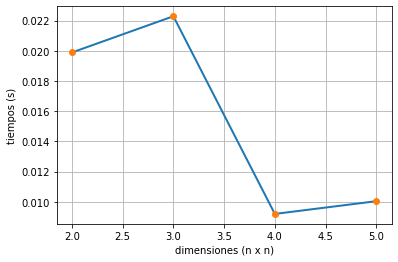

In [ ]:
benchmarking.append([times, 'Seidel'])

plt.plot([2, 3, 4, 5], times, linewidth=2.0)
plt.plot([2, 3, 4, 5], times, 'o', linewidth=2.0)

plt.xlabel('dimensiones (n x n)')
plt.ylabel('tiempos (s)')
plt.grid()
plt.show()

<div align="center">
    Gráfica 5. Gauss-Seidel - tiempos
</div>

### 3.2. Benchmarking

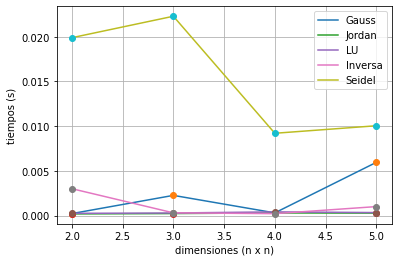

In [ ]:
for bench in benchmarking:
    plt.plot([2, 3, 4, 5], bench[0], label=bench[1])
    plt.plot([2, 3, 4, 5], bench[0], 'o')

plt.xlabel('dimensiones (n x n)')
plt.ylabel('tiempos (s)')
plt.grid()
plt.legend()
plt.show()

<div align="center">
    Gráfica 6. Benchmarking - tiempos
</div>

## 4. Conclusiones

Si algo se debe tener en cuenta en este informe es el error, y como este se correlaciona este con el tiempo y el performance.

Analizando cada uno de los cinco métodos empleados en este informe, nos damos cuenta de las similitudes y diferencias que existen entres sus respectivos algoritmos, algunos de estos usan técnicas de pivote, de recorridos forward y backward, incluso hasta el uso de ambos o como otros que emplean el uso del error.

Así el error no se calcule en la mayoría de este método, no significa que exentos de este, ya que sus resultados por muy aproximados que sean a sus valores esperado poseen un grado mínimo de error.

De los cinco métodos empleados, Gauss fue el más aproximado al resultado esperado, pero con performance muy pobre comparado con los otros métodos, ya que en tiempo es uno de los que más tarde y en cantidad de pasos empleado puede llegar a usar el doble de pasos que usa el método Gauss-Jordan en el peor de los casos, aunque esa cantidad se va estandarizando entre estos dos métodos a medida que aumenta la dimensión de la matriz a calcular.

El método Gauss-Jordan mostró tener un performance en tiempo relativamente mejor a los otros métodos, pero es el método que en sus resultados da la aproximación más lejana, aunque mínima esta.

El método de descomposición LU también demostró ser muy eficiente en términos de tiempo y su resultado tienen la aproximación muy cercana, después de Gauss, también se caracterizó porque su aproximación fue por la derecha del resultado y no por la izquierda como es regular en los otros métodos.

Respecto al método de Gauss-Seidel, sus parámetros de tolerancia de error y máximo de iteración se manipularon múltiples veces para buscar la convergencia del sistema de ecuaciones dado, pero no fue posible llegar a ese punto deseado, lo que nos hace pensar que el algoritmo usado no es conveniente y debería no solo modificarse, sino reemplazarse por uno apropiado.


## 5. Referencias

* [Gaussian Elimination Using Pivoting in Python](https://www.delftstack.com/howto/python/gaussian-elimination-using-pivoting/)
* [Gauss Jordan Method Python Program (With Output)](https://www.codesansar.com/numerical-methods/gauss-jordan-method-python-program-output.htm)
* [Gauss-Jordan Method Tutorial - Step-By-Step Theory & Coding | Numerical Computing with Python](https://youtu.be/xOLJMKGNivU)
* [Python Programming - Gauss Seidel Method | Linear Algebra](https://youtu.be/c6Ng-_Kf2KM)
* [Python : Décomposition LU](https://youtu.be/lhPh5Gp2RNg)
* [How to implement LU decomposition with partial pivoting in Python?](https://stackoverflow.com/questions/28441509/how-to-implement-lu-decomposition-with-partial-pivoting-in-python)
* [Resolución de sistemas de tres ecuaciones por matriz inversa](https://youtu.be/DnLfqXGgEtw)